<a href="https://colab.research.google.com/github/pengj7/Machine_Learning_HW/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

In [2]:
# Uploading File to Colab
from google.colab import files
uploaded = files.upload()

Saving seg2.jpg to seg2.jpg


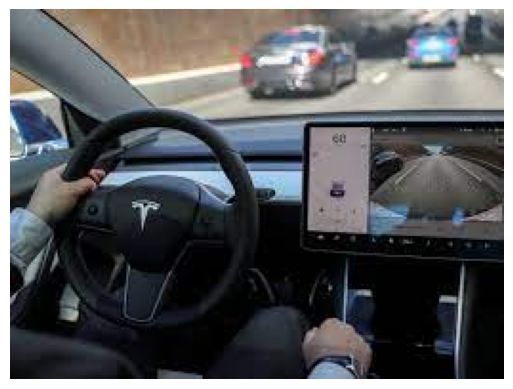

In [3]:
# Loading the Image
image = io.imread('seg2.jpg')  # Replace with the actual path
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
# Reshape the Image
pixels = image.reshape(-1, 3)

In [5]:
# Implement K means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [6]:
# Controid Color
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

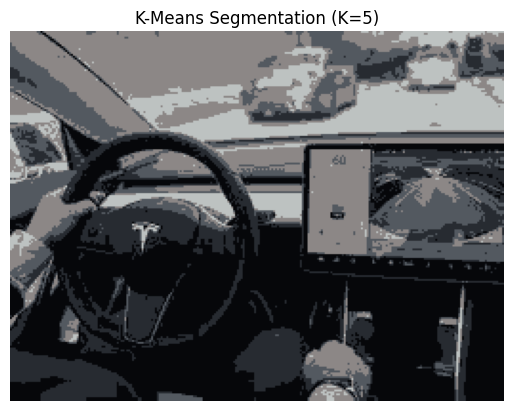

In [7]:
# Convert to Int and Display
segmented_img = segmented_img.astype(np.uint8)
plt.imshow(segmented_img)
plt.axis('off')
plt.title(f'K-Means Segmentation (K={k})')
plt.show()

#Problem 2

In [8]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Import the File
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('housing_prices.csv')

Saving housing_prices.csv to housing_prices.csv


In [10]:
# Extract Target and Feature
X = data[['Population']].values  #Population
y = data[['Prices']].values  #Prices

In [11]:
# Normalize Data
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

In [12]:
# Initialization for Weight and Bias
theta = np.random.randn(2, 1)

In [13]:
# Function for Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

In [14]:
# Mini Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, batch_size, epochs):
    m = len(y)
    X = np.c_[np.ones((m, 1)), X]  # Add bias term
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = (1 / len(y_batch)) * X_batch.T @ (X_batch @ theta - y_batch)
            theta -= learning_rate * gradients

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

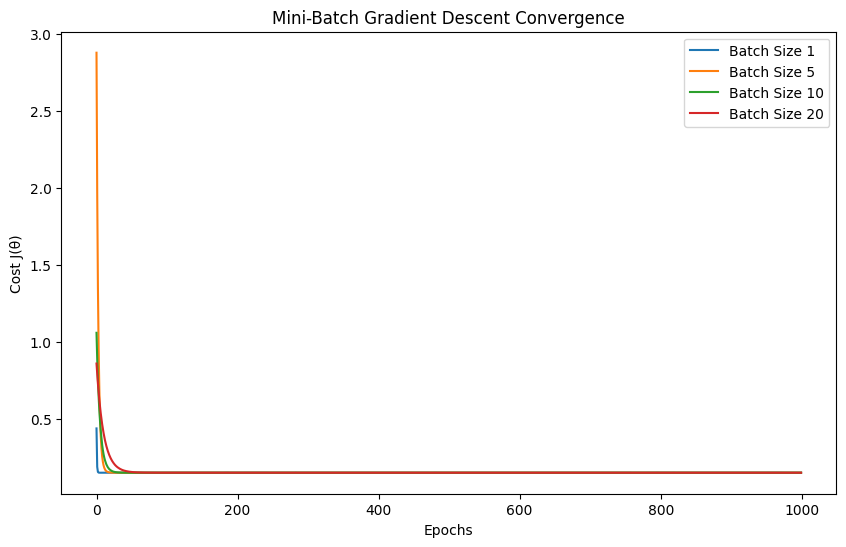

In [15]:
# Test for different batch sizes
batch_sizes = [1, 5, 10, 20]
learning_rate = 0.01
epochs = 1000

plt.figure(figsize=(10, 6))

for batch_size in batch_sizes:
    theta = np.random.randn(2, 1)  # Reinitialize parameters for each run
    theta, cost_history = mini_batch_gradient_descent(X, y, theta, learning_rate, batch_size, epochs)
    plt.plot(cost_history, label=f'Batch Size {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Cost J(θ)')
plt.title('Mini-Batch Gradient Descent Convergence')
plt.legend()
plt.show()

#Problem 3

In [16]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [17]:
# Loading Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [18]:
# Preparing the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
# Recursive Feature Elimination
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')
rfe = RFE(log_reg, n_features_to_select=2)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=5000, solver='liblinear'),
    n_features_to_select=2)

In [20]:
# Select best two features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['worst radius', 'worst concavity'], dtype='object')


In [21]:
# Train Log Regression
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

log_reg.fit(X_train_selected, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [22]:
# Predictions
y_pred = log_reg.predict(X_test_selected)

In [23]:
# Scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9298
Precision: 0.9130
Recall: 0.9813
F1 Score: 0.9459


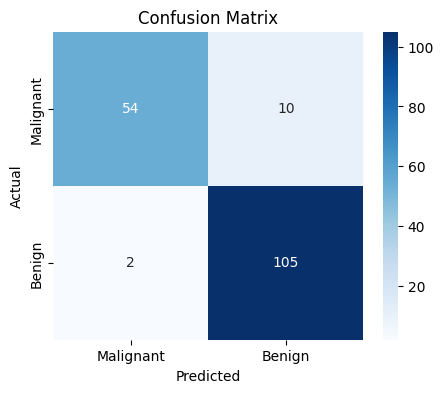

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Problem 4

In [25]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [26]:
# Load Previous Data
data = pd.read_csv('housing_prices.csv')

In [27]:
# Establish Target and Feature
X = data[['Population']].values
y = data[['Prices']].values

In [28]:
# Split Training Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Normalize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [30]:
# Construct Neural Network
model = keras.Sequential([
    keras.layers.Dense(2, activation='relu', input_shape=(1,)),  # Hidden layer with 2 neurons
    keras.layers.Dense(1)  # Output layer
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Train the Network
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 66.2092 - val_loss: 53.5203
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 61.1026 - val_loss: 49.6733
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 58.4785 - val_loss: 47.5328
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 55.2121 - val_loss: 44.3570
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 54.9179 - val_loss: 42.2845
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 50.6305 - val_loss: 40.6777
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 47.5517 - val_loss: 38.5307
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 49.9793 - val_loss: 36.3114
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 38.9618 - val_loss: 30.0359
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 32.9302 - val_loss: 23.7703
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 26.6468 - val_loss: 17.8410
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step -

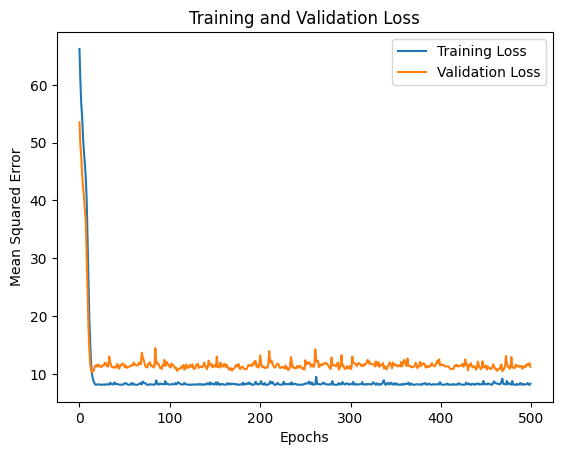

In [32]:
# Plot of Training and Validation Losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [33]:
# Predicting New Housing Prices
pop_input = np.array([[165000]])
pop_input_scaled = scaler.transform(pop_input)

predicted_price = model.predict(pop_input_scaled)
print(f'Predicted House Price: {predicted_price[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted House Price: 207887.05


In [34]:
# Evaluate Model Performance
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Root Mean Squared Error (RMSE): 3.35
